In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data Overview

In [3]:
store_data=pd.read_csv('/Users/kshitijmittal/Documents/UChicago Acad/01 Quarter 1/02 Data Science for Consulting/Wk9/Fin_Assignment_9.csv',index_col=0)

In [4]:
store_data.shape

(33713, 65)

In [5]:
store_data.iloc[0:5]

,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
914,NaN,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
957,NaN,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0
1406,NaN,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1414,NaN,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
1546,NaN,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0


In [6]:
store_data.columns

Index(['logtarg', 'r', 'f', 'm', 'tof', 'Ffiction1', 'Fclassics3',
       'Fcartoons5', 'Flegends6', 'Fphilosophy7', 'Freligion8', 'Fpsychology9',
       'Flinguistics10', 'Fart12', 'Fmusic14', 'Ffacsimile17', 'Fhistory19',
       'Fconthist20', 'Feconomy21', 'Fpolitics22', 'Fscience23', 'Fcompsci26',
       'Frailroads27', 'Fmaps30', 'Ftravelguides31', 'Fhealth35', 'Fcooking36',
       'Flearning37', 'FGamesRiddles38', 'Fsports39', 'Fhobby40', 'Fnature41',
       'Fencyclopaedia44', 'Fvideos50', 'Fnonbooks99', 'Mfiction1',
       'Mclassics3', 'Mcartoons5', 'Mlegends6', 'Mphilosophy7', 'Mreligion8',
       'Mpsychology9', 'Mlinguistics10', 'Mart12', 'Mmusic14', 'Mfacsimile17',
       'Mhistory19', 'Mconthist20', 'Meconomy21', 'Mpolitics22', 'Mscience23',
       'Mcompsci26', 'Mrailroads27', 'Mmaps30', 'Mtravelguides31', 'Mhealth35',
       'Mcooking36', 'Mlearning37', 'MGamesRiddles38', 'Msports39', 'Mhobby40',
       'Mnature41', 'Mencyclopaedia44', 'Mvideos50', 'Mnonbooks99'],
     

# Part 1: EDA

### Perform descriptive statistics on all variables to help understand the data, the distributions and basic info you have to work with on this challenge. (Mean, Standard Deviation, Median, Min, Max and Histogram)

I segregated the 65 columns into three subsets for ease of analysis:
- Frequency: Columns starting with an F, denoting the # of transactions for each product category
- Monetary:  Columns starting with an M, denoting the monetary value of transactions for each product category
- Data calculated R,F,M categories

In [7]:
freq_col = [col for col in store_data if col.startswith('F')]
monetary_col = [col for col in store_data if col.startswith('M')]
overall_col = ['r','f','m','tof']

store_data[freq_col].describe()

,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99
count,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.00000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,0.590900,0.228102,0.356480,0.104767,0.290659,0.980957,0.046570,0.203215,0.608549,2.320974,0.050960,2.647940,2.153947,0.208377,0.029959,0.410791,0.150862,0.187020,0.074986,1.484976,2.109898,0.425444,0.61718,0.034497,0.001809,0.637736,0.317237,0.480912,0.407617,0.463174
std,1.762201,0.865510,1.105653,0.527764,1.088606,3.112212,0.262156,0.641489,1.884077,6.681362,0.398608,5.930653,5.989002,0.755520,0.190992,1.480713,0.596788,0.974306,0.335845,4.368954,5.340294,1.695695,1.64184,0.207741,0.043191,1.723662,1.049727,1.253211,1.306615,1.447000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,109.000000,29.000000,49.000000,22.000000,35.000000,134.000000,8.000000,21.000000,113.000000,264.000000,23.000000,192.000000,213.000000,18.000000,6.000000,55.000000,17.000000,61.000000,10.000000,164.000000,210.000000,78.000000,59.00000,6.000000,2.000000,56.000000,53.000000,50.000000,55.000000,110.000000


In [8]:
store_data[monetary_col].describe()

,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99
count,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000,33713.000000
mean,5.191555,3.909188,2.493460,1.249562,3.806866,16.368536,0.716569,2.214243,10.756127,29.261677,3.694856,39.064488,24.951676,2.015893,0.315122,4.861522,1.328445,2.103172,1.456697,14.634508,29.095301,4.223431,21.147507,0.305226,0.020681,6.785558,3.728635,8.402428,6.020431,1.800973
std,17.670335,28.864567,8.444797,8.180311,18.350047,797.146228,6.795593,9.197459,38.383837,1377.712988,90.674547,95.897338,71.814323,8.020535,2.206537,19.315840,5.783000,10.894953,10.671295,44.685317,2087.221131,19.975164,2898.452008,1.991675,0.501499,21.197488,15.007592,46.021881,19.643978,21.383867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.640831,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.556458,0.000000,0.000000,0.000000,0.000000,7.949997,0.000000,0.000000,5.087353,19.237610,0.000000,39.849976,20.400543,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.680038,18.899994,0.000000,2.500000,0.000000,0.000000,5.112919,0.000000,0.000000,0.000000,0.000000
max,1085.540039,1727.143555,344.655762,454.507324,654.948731,146154.750000,299.000000,810.397461,2632.572266,252683.375000,9440.882813,4158.085938,2489.914063,242.269653,55.907959,585.910156,173.527100,570.722168,672.859863,1571.788086,383154.500000,820.563477,532182.000000,78.724670,21.448685,771.610840,735.354981,1999.150391,794.137695,2412.960938


In [9]:
store_data[overall_col].describe()

,r,f,m,tof
count,33713.000000,33713.000000,33713.000000,33713.000000
mean,508.427254,5.820603,251.924325,1296.088186
std,542.440039,7.008049,3929.929826,818.976321
min,0.000000,0.000000,0.000000,0.000000
25%,117.000000,1.000000,39.899994,536.000000
50%,293.000000,3.000000,102.629944,1311.000000
75%,712.000000,7.000000,247.297485,2132.000000
max,2460.000000,118.000000,532892.000000,2462.000000


In [10]:
store_data.isnull().sum(axis=0)
#Will be removing logtarg column

store_data.dtypes

logtarg             float64
r                     int64
f                     int64
m                   float64
tof                   int64
Ffiction1             int64
Fclassics3            int64
Fcartoons5            int64
Flegends6             int64
Fphilosophy7          int64
Freligion8            int64
Fpsychology9          int64
Flinguistics10        int64
Fart12                int64
Fmusic14              int64
Ffacsimile17          int64
Fhistory19            int64
Fconthist20           int64
Feconomy21            int64
Fpolitics22           int64
Fscience23            int64
Fcompsci26            int64
Frailroads27          int64
Fmaps30               int64
Ftravelguides31       int64
Fhealth35             int64
Fcooking36            int64
Flearning37           int64
FGamesRiddles38       int64
Fsports39             int64
Fhobby40              int64
Fnature41             int64
Fencyclopaedia44      int64
Fvideos50             int64
Fnonbooks99           int64
Mfiction1           

/var/folders/bc/l3jxf3wn11n_gkl2jz5m2vph0000gn/T/ipykernel_67152/928904331.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  store_data[overall_col].hist(ax=ax, color='maroon')


array([[<AxesSubplot:title={'center':'r'}>,
        <AxesSubplot:title={'center':'f'}>],
       [<AxesSubplot:title={'center':'m'}>,
        <AxesSubplot:title={'center':'tof'}>]], dtype=object)

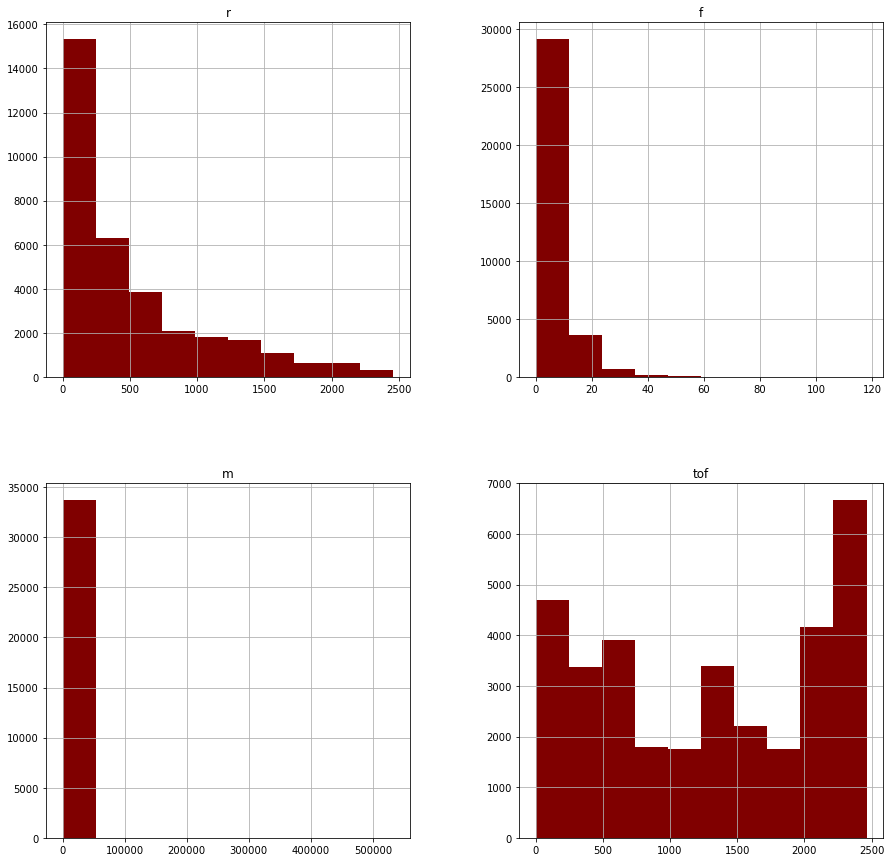

In [11]:
fig=plt.figure(figsize = (15,15))
ax=fig.gca()
store_data[overall_col].hist(ax=ax, color='maroon')

/var/folders/bc/l3jxf3wn11n_gkl2jz5m2vph0000gn/T/ipykernel_67152/1301577596.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  store_data[monetary_col].hist(ax=ax2, color='green')


array([[<AxesSubplot:title={'center':'Mfiction1'}>,
        <AxesSubplot:title={'center':'Mclassics3'}>,
        <AxesSubplot:title={'center':'Mcartoons5'}>,
        <AxesSubplot:title={'center':'Mlegends6'}>,
        <AxesSubplot:title={'center':'Mphilosophy7'}>],
       [<AxesSubplot:title={'center':'Mreligion8'}>,
        <AxesSubplot:title={'center':'Mpsychology9'}>,
        <AxesSubplot:title={'center':'Mlinguistics10'}>,
        <AxesSubplot:title={'center':'Mart12'}>,
        <AxesSubplot:title={'center':'Mmusic14'}>],
       [<AxesSubplot:title={'center':'Mfacsimile17'}>,
        <AxesSubplot:title={'center':'Mhistory19'}>,
        <AxesSubplot:title={'center':'Mconthist20'}>,
        <AxesSubplot:title={'center':'Meconomy21'}>,
        <AxesSubplot:title={'center':'Mpolitics22'}>],
       [<AxesSubplot:title={'center':'Mscience23'}>,
        <AxesSubplot:title={'center':'Mcompsci26'}>,
        <AxesSubplot:title={'center':'Mrailroads27'}>,
        <AxesSubplot:title={'center':

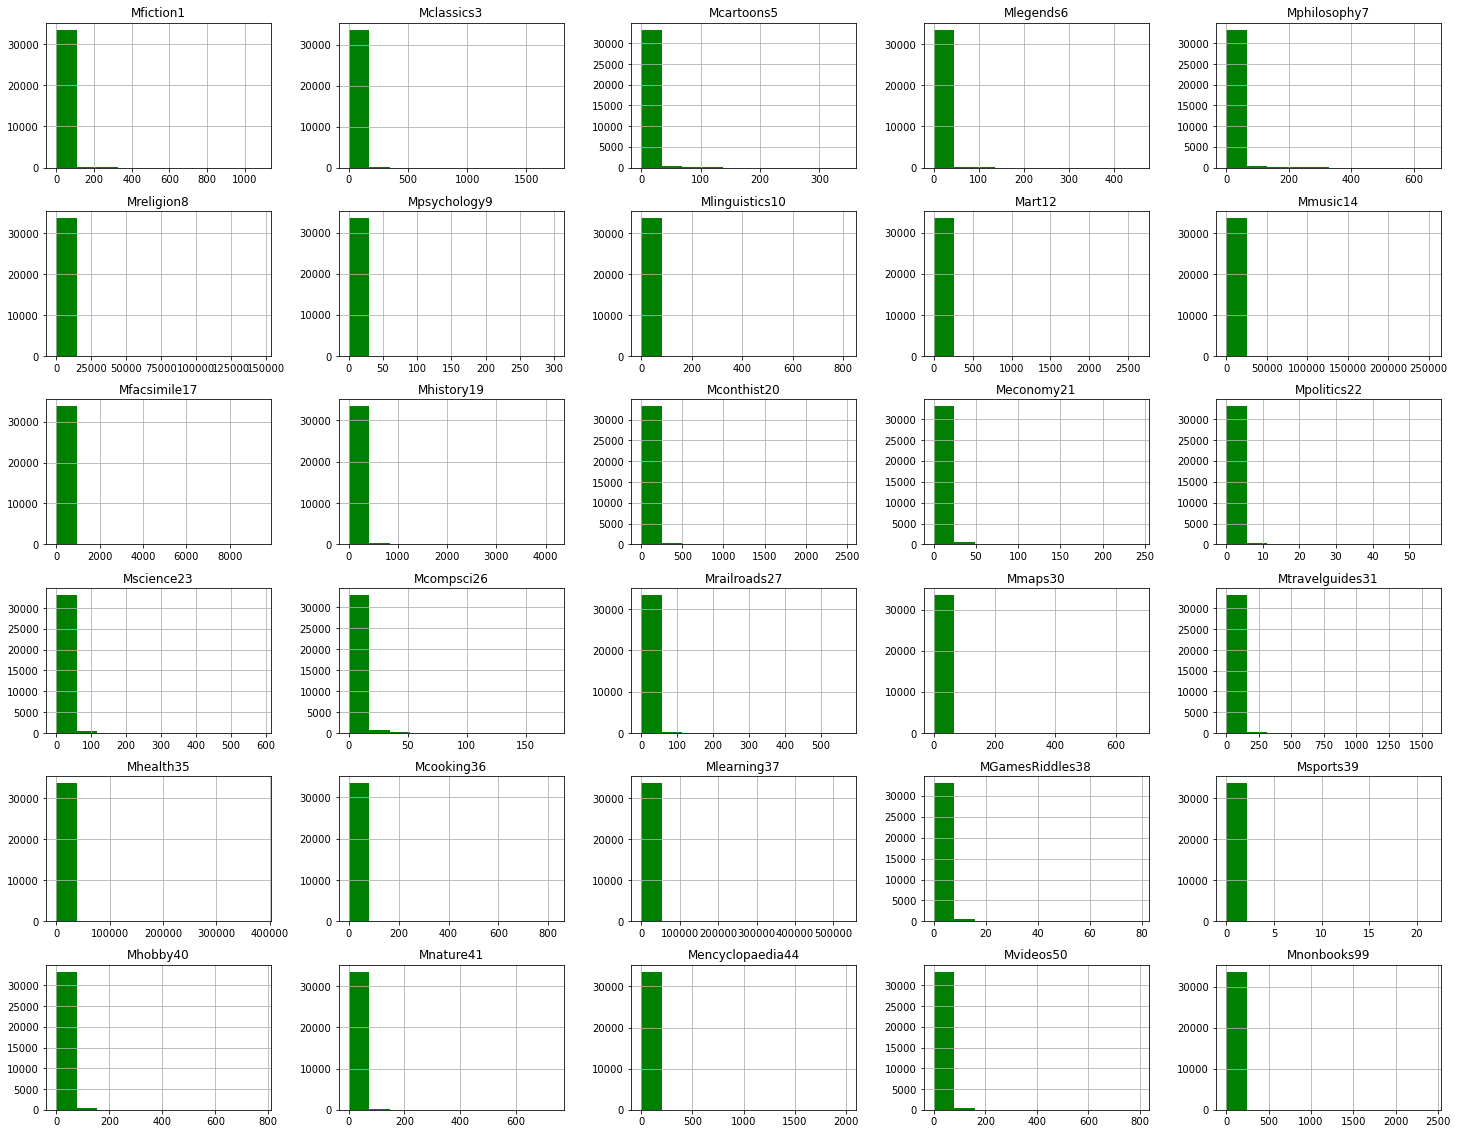

In [12]:
fig2=plt.figure(figsize = (25,20))
ax2=fig2.gca()
store_data[monetary_col].hist(ax=ax2, color='green')

/var/folders/bc/l3jxf3wn11n_gkl2jz5m2vph0000gn/T/ipykernel_67152/1078178051.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  store_data[freq_col].hist(ax=ax3, color='blue')


array([[<AxesSubplot:title={'center':'Ffiction1'}>,
        <AxesSubplot:title={'center':'Fclassics3'}>,
        <AxesSubplot:title={'center':'Fcartoons5'}>,
        <AxesSubplot:title={'center':'Flegends6'}>,
        <AxesSubplot:title={'center':'Fphilosophy7'}>],
       [<AxesSubplot:title={'center':'Freligion8'}>,
        <AxesSubplot:title={'center':'Fpsychology9'}>,
        <AxesSubplot:title={'center':'Flinguistics10'}>,
        <AxesSubplot:title={'center':'Fart12'}>,
        <AxesSubplot:title={'center':'Fmusic14'}>],
       [<AxesSubplot:title={'center':'Ffacsimile17'}>,
        <AxesSubplot:title={'center':'Fhistory19'}>,
        <AxesSubplot:title={'center':'Fconthist20'}>,
        <AxesSubplot:title={'center':'Feconomy21'}>,
        <AxesSubplot:title={'center':'Fpolitics22'}>],
       [<AxesSubplot:title={'center':'Fscience23'}>,
        <AxesSubplot:title={'center':'Fcompsci26'}>,
        <AxesSubplot:title={'center':'Frailroads27'}>,
        <AxesSubplot:title={'center':

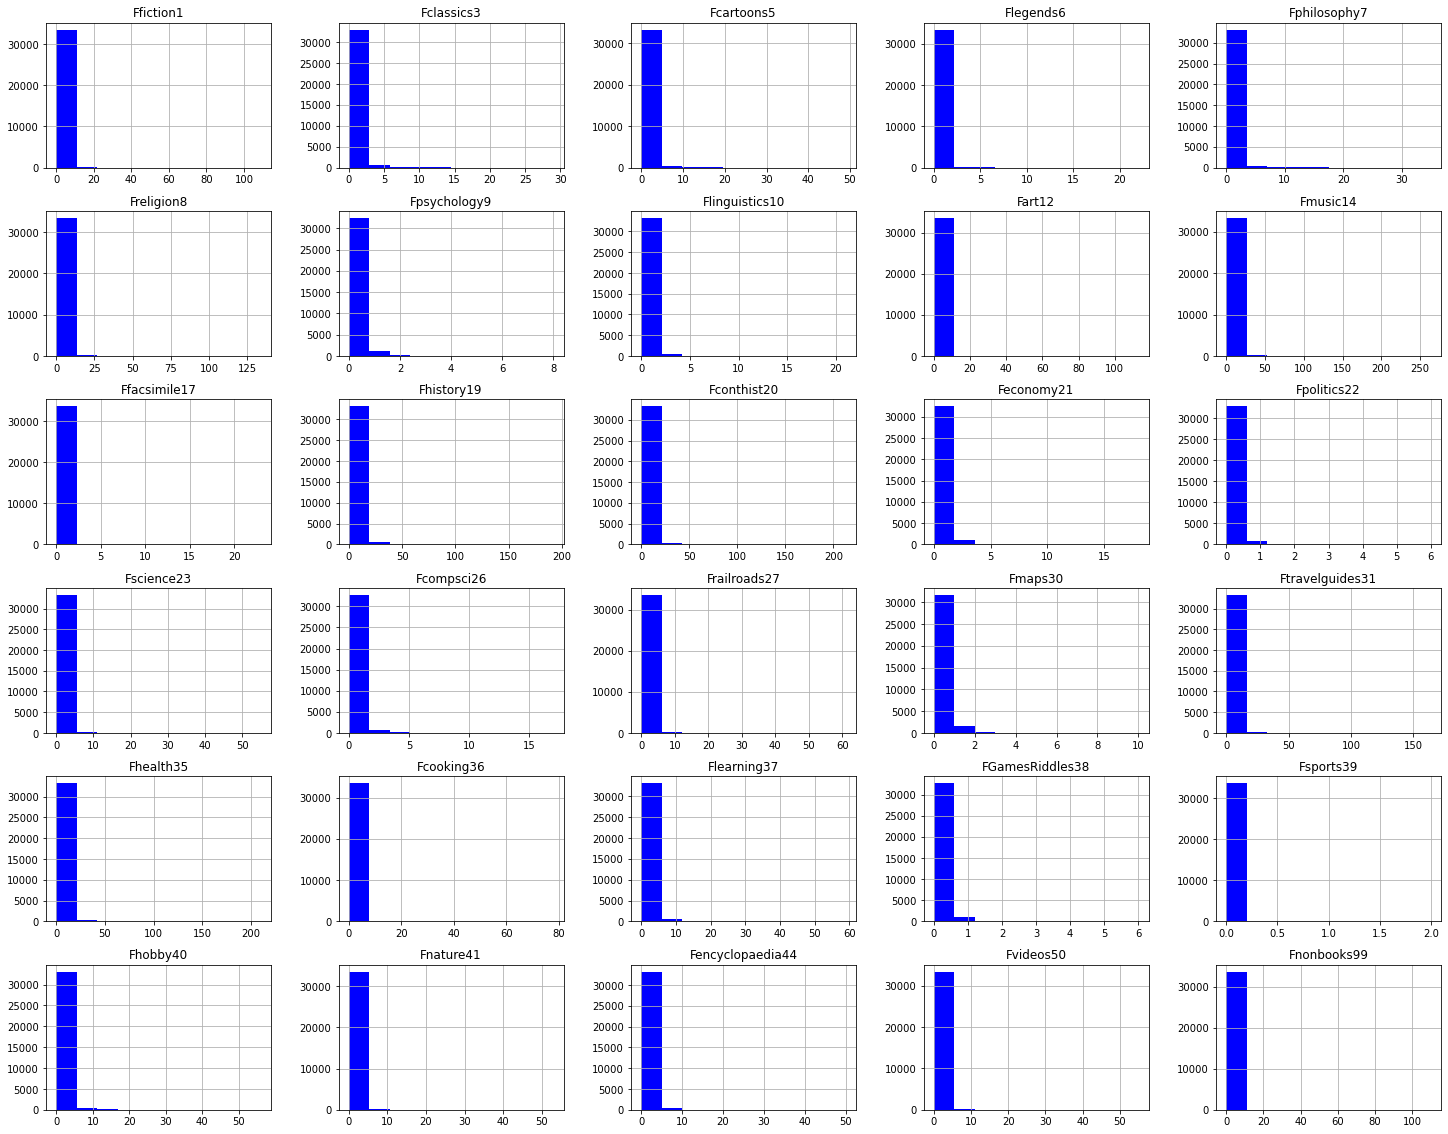

In [13]:
fig3=plt.figure(figsize = (25,20))
ax3=fig3.gca()
store_data[freq_col].hist(ax=ax3, color='blue')

# Part 2 - Create a new data set with more descriptive labels and data needed for analysis

Understanding RFM Variables

Recency: The more recently a customer has interacted or transacted with a brand. How long has it been since a customer engaged in an activity or made a purchase with the brand? The most common activity is a purchase for an online book store, though other examples include the most recent visit to a website.

Frequency: During a given time period, how many times has a consumer transacted or interacted with the brand? Customers who participate in activities regularly are clearly more involved and loyal than those who do so infrequently. 
It answers the question, how often?

Monetary: This factor, also known as “monetary value,” reflects how much a customer has spent with the brand over a given period of time. Those who spend a lot of money should be handled differently from customers who spend a little. 
The average purchase amount is calculated by dividing monetary by frequency, which is a significant secondary element to consider when segmenting customers.


### I am creating two new monetary and frequency variables by adding all monetary and frequency product variables 

In [14]:
store_data["Monetary"]=np.sum(store_data[monetary_col],axis=1)
store_data["Frequency"]=np.sum(store_data[freq_col],axis=1)
store_data.head()

,logtarg,r,f,m,tof,Ffiction1,Fclassics3,Fcartoons5,Flegends6,Fphilosophy7,Freligion8,Fpsychology9,Flinguistics10,Fart12,Fmusic14,Ffacsimile17,Fhistory19,Fconthist20,Feconomy21,Fpolitics22,Fscience23,Fcompsci26,Frailroads27,Fmaps30,Ftravelguides31,Fhealth35,Fcooking36,Flearning37,FGamesRiddles38,Fsports39,Fhobby40,Fnature41,Fencyclopaedia44,Fvideos50,Fnonbooks99,Mfiction1,Mclassics3,Mcartoons5,Mlegends6,Mphilosophy7,Mreligion8,Mpsychology9,Mlinguistics10,Mart12,Mmusic14,Mfacsimile17,Mhistory19,Mconthist20,Meconomy21,Mpolitics22,Mscience23,Mcompsci26,Mrailroads27,Mmaps30,Mtravelguides31,Mhealth35,Mcooking36,Mlearning37,MGamesRiddles38,Msports39,Mhobby40,Mnature41,Mencyclopaedia44,Mvideos50,Mnonbooks99,Monetary,Frequency
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
914,NaN,194,7,318.894775,1703,1,0,1,0,0,0,0,0,1,7,0,0,17,0,0,0,0,0,0,2,2,1,0,0,0,0,0,0,0,0,5.949997,0.0,7.643810,0.0,0.00000,0.000000,0.0,0.000000,8.589699,61.429962,0.0,0.000000,197.935547,0.000000,0.0,0.000000,0.000000,0.000000,0.0,12.271004,14.899994,10.174706,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,318.894718,32
957,NaN,3,14,368.052246,2364,1,0,2,0,0,0,0,0,0,4,0,4,4,0,0,0,1,0,0,0,7,0,4,0,0,4,2,1,0,0,12.680038,0.0,20.236496,0.0,0.00000,0.000000,0.0,0.000000,0.000000,29.414169,0.0,53.839020,60.749969,0.000000,0.0,0.000000,5.899998,0.000000,0.0,0.000000,74.156250,0.000000,22.749985,0.0,0.0,61.176025,17.150269,10.0,0.000000,0.0,368.052219,34
1406,NaN,1489,15,423.298340,2371,0,0,0,0,0,0,0,0,0,0,0,1,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,10.123573,413.174805,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,423.298378,35
1414,NaN,155,4,71.217041,1290,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,71.217041,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,71.217041,7
1546,NaN,194,6,442.638184,2188,0,0,1,0,3,1,0,1,1,3,0,6,7,1,0,2,0,2,0,1,3,0,2,0,0,2,0,0,3,0,0.000000,0.0,8.899994,0.0,26.19841,19.899994,0.0,6.621227,15.313187,39.804047,0.0,64.744934,86.945740,5.112919,0.0,19.849991,0.000000,9.960655,0.0,10.123573,41.518219,0.000000,7.949997,0.0,0.0,17.895203,0.000000,0.0,61.799988,0.0,442.638077,39


### Creating a subset of the data more pertinent to the analysis

In [15]:
sel_col=["r","Frequency","Monetary","f","m"]
store_data_p=store_data[sel_col]

In [16]:
store_data_p.head()
store_data_p.rename(columns={'r':'Recency',
                            'f':'Frequency_original',
                            'm':'Monetary_original'},inplace=True)
store_data_p['Monetary_Avg']=store_data_p['Monetary']/store_data_p['Frequency']

/var/folders/bc/l3jxf3wn11n_gkl2jz5m2vph0000gn/T/ipykernel_67152/3890687973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_p.rename(columns={'r':'Recency',
/var/folders/bc/l3jxf3wn11n_gkl2jz5m2vph0000gn/T/ipykernel_67152/3890687973.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data_p['Monetary_Avg']=store_data_p['Monetary']/store_data_p['Frequency']


In [17]:
store_data_p.head()

,Recency,Frequency,Monetary,Frequency_original,Monetary_original,Monetary_Avg
id,,,,,,
914,194,32,318.894718,7,318.894775,9.965460
957,3,34,368.052219,14,368.052246,10.825065
1406,1489,35,423.298378,15,423.298340,12.094239
1414,155,7,71.217041,4,71.217041,10.173863
1546,194,39,442.638077,6,442.638184,11.349694


### Plotting RFM Distributions and analyzing the outliers

/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wi

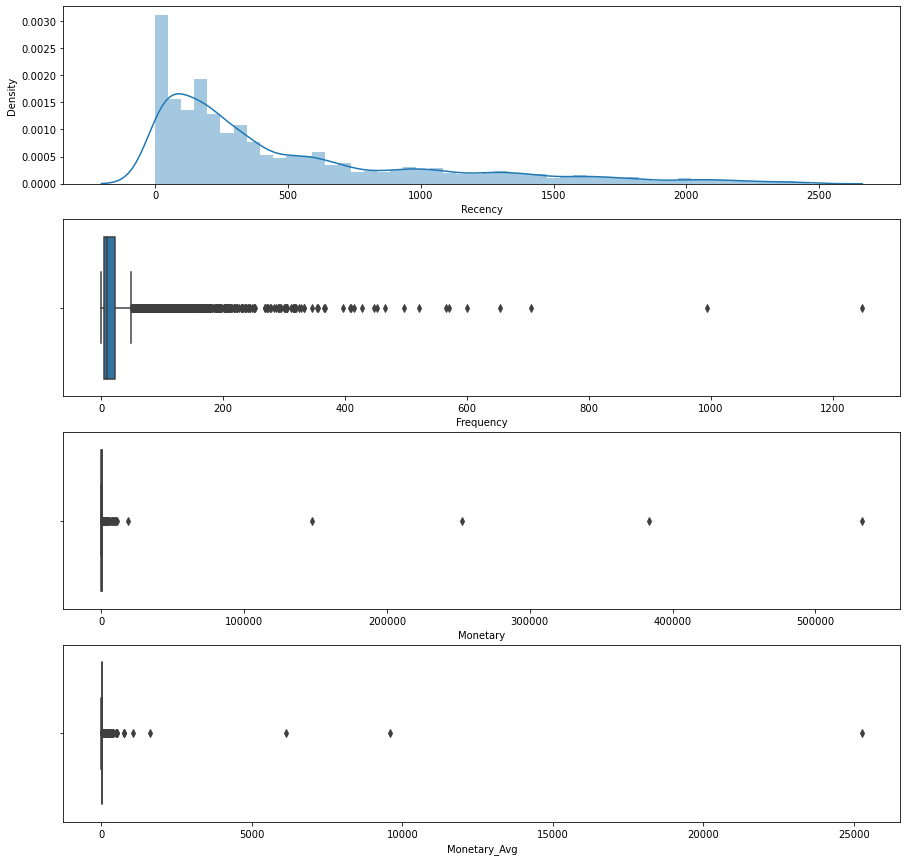

In [18]:
# Plotting RFM distributions
plt.figure(figsize=(15,15))
# Plot distribution of R
plt.subplot(4, 1, 1); sns.distplot(store_data_p['Recency'])
# Plot distribution of F
plt.subplot(4, 1, 2); sns.boxplot(store_data_p['Frequency'])
# Plot distribution of M
plt.subplot(4, 1, 3); sns.boxplot(store_data_p['Monetary'])
# Plot distribution of M
plt.subplot(4, 1, 4); sns.boxplot(store_data_p['Monetary_Avg'])
# Show the plot
plt.show()

In [19]:
# Row outliers
def remove_outliers(df, columns):
    int_df = df
    for x in int_df[columns]:
        int_df = int_df[int_df[x] < df[x].quantile(0.99)]
    return int_df


In [20]:
store_data_p = remove_outliers(store_data_p,["Recency","Frequency","Monetary"])

In [21]:
store_data_p.shape

(32923, 6)

### In this step, we are analyzing the data set after outliers are removed

/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kshitijmittal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

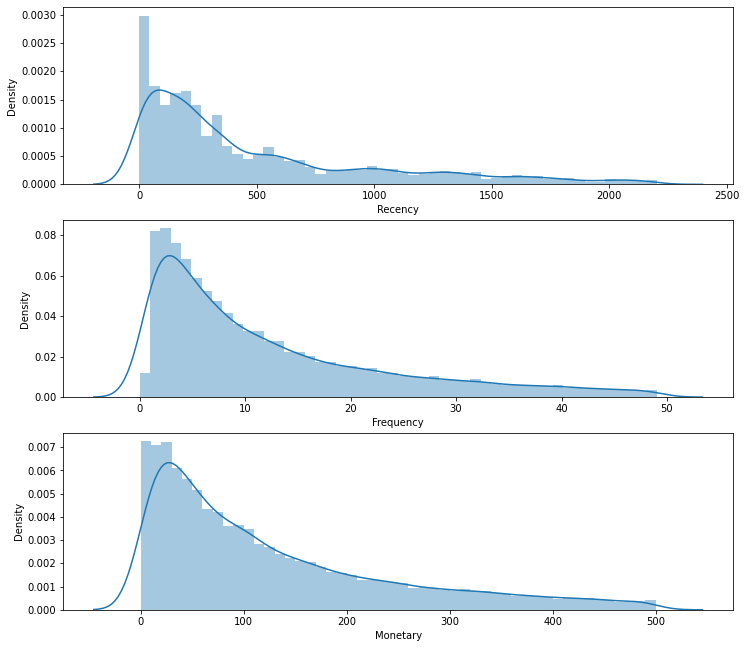

In [22]:
# Plotting RFM distributions
plt.figure(figsize=(12,15))
# Plot distribution of R
plt.subplot(4, 1, 1); sns.distplot(store_data_p['Recency'])
# Plot distribution of F
plt.subplot(4, 1, 2); sns.distplot(store_data_p[store_data_p['Frequency']<50].Frequency)
# Plot distribution of M
plt.subplot(4, 1, 3); sns.distplot(store_data_p[store_data_p['Monetary']<500].Monetary)
# Show the plot
plt.show()

# Building RFM Groups

In [23]:
r_labels = range(4,0,-1)
f_labels = range(1,5)
m_labels = range(1,5)

In [24]:
store_data_p['R'] = pd.qcut(store_data_p['Recency'], q=4, labels=r_labels)
store_data_p['F'] = pd.qcut(store_data_p['Frequency'], q=4, labels=f_labels)
store_data_p['M'] = pd.qcut(store_data_p['Monetary'], q=4, labels=m_labels)



In [25]:
store_data_p['R'].describe(percentiles=[0, 0.25, 0.50, 0.75,1])

count     32923
unique        4
top           2
freq       8276
Name: R, dtype: int64

In [26]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
store_data_p['RFM_Segment_Concat'] = store_data_p.apply(join_rfm, axis=1)
store_data_p.head()

,Recency,Frequency,Monetary,Frequency_original,Monetary_original,Monetary_Avg,R,F,M,RFM_Segment_Concat
id,,,,,,,,,,
914,194,32,318.894718,7,318.894775,9.965460,3,4,4,3.04.04.0
957,3,34,368.052219,14,368.052246,10.825065,4,4,4,4.04.04.0
1406,1489,35,423.298378,15,423.298340,12.094239,1,4,4,1.04.04.0
1414,155,7,71.217041,4,71.217041,10.173863,3,2,2,3.02.02.0
1546,194,39,442.638077,6,442.638184,11.349694,3,4,4,3.04.04.0


In [27]:
store_data_rfm=store_data_p

In [28]:
print(store_data_rfm['RFM_Segment_Concat'].unique())
store_data_rfm['RFM_Score'] = store_data_rfm[['R','F','M']].sum(axis=1)
store_data_rfm.head()

['3.04.04.0' '4.04.04.0' '1.04.04.0' '3.02.02.0' '1.01.02.0' '2.02.02.0'
 '4.03.03.0' '2.03.03.0' '3.03.03.0' '4.04.03.0' '2.04.04.0' '1.01.01.0'
 '1.02.02.0' '2.01.02.0' '1.03.03.0' '2.03.04.0' '4.03.02.0' '4.01.01.0'
 '4.02.02.0' '3.03.04.0' '1.03.02.0' '3.01.01.0' '4.03.04.0' '1.02.04.0'
 '2.01.01.0' '2.04.03.0' '1.02.03.0' '2.02.03.0' '3.04.03.0' '3.02.01.0'
 '1.02.01.0' '1.03.04.0' '3.02.04.0' '2.02.01.0' '4.02.03.0' '2.03.02.0'
 '3.02.03.0' '3.03.02.0' '1.04.03.0' '3.01.02.0' '4.01.02.0' '4.02.04.0'
 '1.01.03.0' '2.02.04.0' '4.02.01.0' '2.01.03.0' '4.01.03.0' '2.01.04.0'
 '1.01.04.0' '3.01.04.0' '3.01.03.0' '1.04.02.0' '4.04.01.0' '4.01.04.0'
 '3.03.01.0' '1.03.01.0' '4.03.01.0' '2.03.01.0' '4.04.02.0']


,Recency,Frequency,Monetary,Frequency_original,Monetary_original,Monetary_Avg,R,F,M,RFM_Segment_Concat,RFM_Score
id,,,,,,,,,,,
914,194,32,318.894718,7,318.894775,9.965460,3,4,4,3.04.04.0,11
957,3,34,368.052219,14,368.052246,10.825065,4,4,4,4.04.04.0,12
1406,1489,35,423.298378,15,423.298340,12.094239,1,4,4,1.04.04.0,9
1414,155,7,71.217041,4,71.217041,10.173863,3,2,2,3.02.02.0,7
1546,194,39,442.638077,6,442.638184,11.349694,3,4,4,3.04.04.0,11


In [29]:
def calc_rfm_level(df):
    if df['RFM_Score'] >= 11:
        return '1. Can\'t Lose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 11)):
        return '2. Loyal Champions'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 8)):
        return '3. Potential and Promising'
    else:
        return '4. Requires Activation'

store_data_rfm['RFM_Level'] = store_data_p.apply(calc_rfm_level, axis=1)


In [30]:
store_data_rfm.head()

,Recency,Frequency,Monetary,Frequency_original,Monetary_original,Monetary_Avg,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
id,,,,,,,,,,,,
914,194,32,318.894718,7,318.894775,9.965460,3,4,4,3.04.04.0,11,1. Can't Lose Them
957,3,34,368.052219,14,368.052246,10.825065,4,4,4,4.04.04.0,12,1. Can't Lose Them
1406,1489,35,423.298378,15,423.298340,12.094239,1,4,4,1.04.04.0,9,2. Loyal Champions
1414,155,7,71.217041,4,71.217041,10.173863,3,2,2,3.02.02.0,7,3. Potential and Promising
1546,194,39,442.638077,6,442.638184,11.349694,3,4,4,3.04.04.0,11,1. Can't Lose Them


# Segment Visualizations 

In [31]:
store_data_rfm_level_agg = store_data_rfm.groupby('RFM_Level').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean','count']
}).round(1)

print(store_data_rfm_level_agg)

                           Recency Frequency Monetary       
                              mean      mean     mean  count
RFM_Level                                                   
1. Can't Lose Them            98.9      46.9    506.4   5142
2. Loyal Champions           358.3      20.8    241.8  10485
3. Potential and Promising   531.3       7.2     85.7   7956
4. Requires Activation       832.8       3.2     34.9   9340


In [32]:
store_data_rfm_level_median = store_data_rfm.groupby('RFM_Level').agg({
    'Recency':'median',
    'Frequency':'median',
    'Monetary':['median','count']
}).round(1)

print(store_data_rfm_level_median)

                           Recency Frequency Monetary       
                            median    median   median  count
RFM_Level                                                   
1. Can't Lose Them            76.0      40.0    421.6   5142
2. Loyal Champions           256.0      16.0    176.6  10485
3. Potential and Promising   339.0       7.0     71.7   7956
4. Requires Activation       704.0       3.0     27.9   9340


([<matplotlib.patches.Wedge at 0x7f9239bf3b20>,
 [Text(0.5938658200835986, 0.9259175923031353, '2. Loyal Champions'),
  Text(-1.0659833415809135, 0.27143970872366846, '4. Requires Activation'),
  Text(-0.18578502165314223, -1.084197364749307, '3. Potential and Promising'),
  Text(0.9702230652746048, -0.5183311717513719, "1. Can't Lose Them")],
 [Text(0.32392681095469006, 0.5050459594380737, '32%'),
  Text(-0.5814454590441345, 0.14805802294018278, '28%'),
  Text(-0.10133728453807757, -0.5913803807723492, '24%'),
  Text(0.5292125810588753, -0.28272609368256646, '16%')])

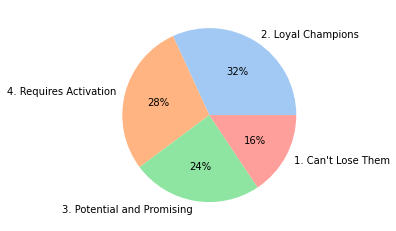

In [33]:
colors = sns.color_palette('pastel')[0:4]
plt.pie(store_data_rfm['RFM_Level'].value_counts(),
       labels=store_data_rfm['RFM_Level'].value_counts().index, colors=colors,
       autopct='%.0f%%')

In [34]:
store_data_rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean','Count']
store_data_rfm_level_agg.columns

store_data_rfm_level_agg.head()

,RecencyMean,FrequencyMean,MonetaryMean,Count
RFM_Level,,,,
1. Can't Lose Them,98.9,46.9,506.4,5142
2. Loyal Champions,358.3,20.8,241.8,10485
3. Potential and Promising,531.3,7.2,85.7,7956
4. Requires Activation,832.8,3.2,34.9,9340


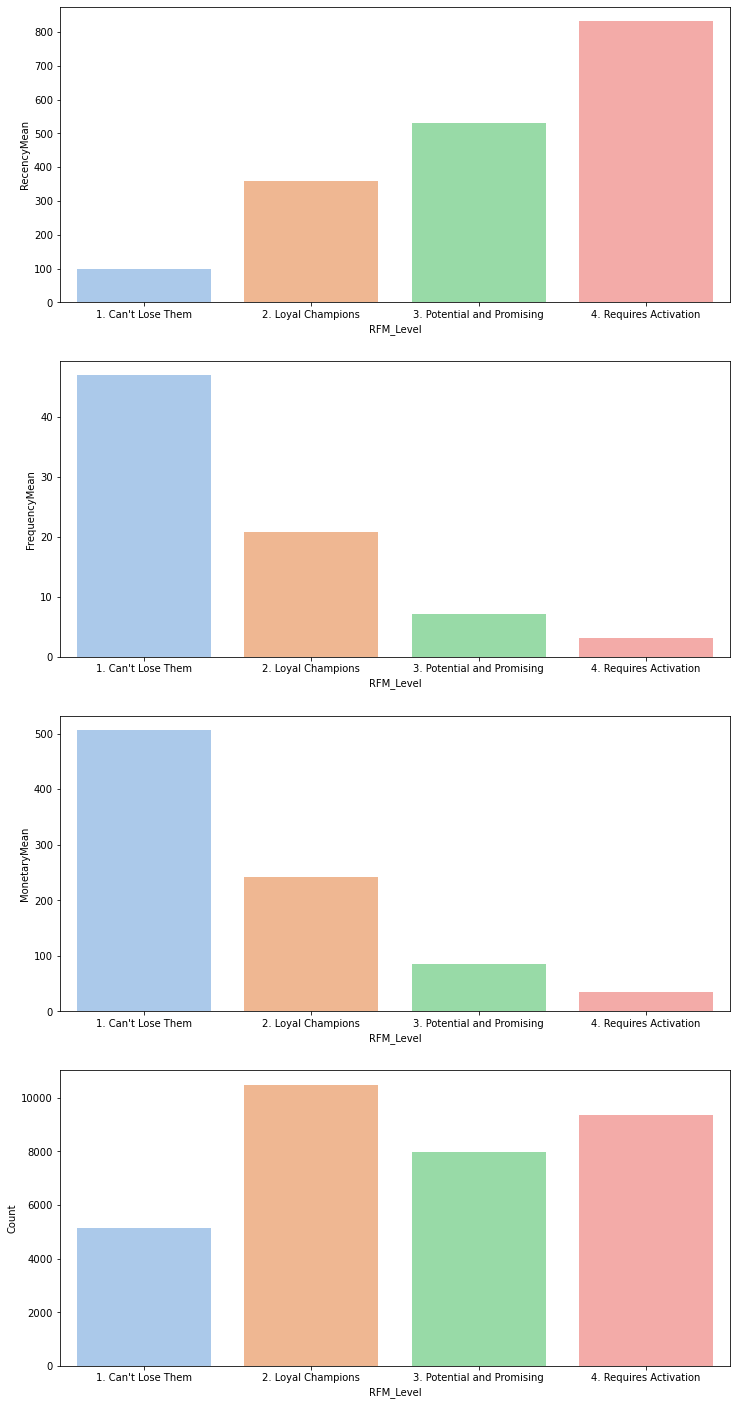

In [35]:
# Plotting RFM distributions
plt.figure(figsize=(12,25))
colors = sns.color_palette('pastel')[0:4]

# Plot distribution of R
plt.subplot(4, 1, 1); 
sns.barplot(data=store_data_rfm_level_agg,x=store_data_rfm_level_agg["RecencyMean"].index, y="RecencyMean",
           palette=colors)

plt.subplot(4, 1, 2); 
sns.barplot(data=store_data_rfm_level_agg,x=store_data_rfm_level_agg["FrequencyMean"].index, y="FrequencyMean",
           palette=colors)

plt.subplot(4, 1, 3); 
sns.barplot(data=store_data_rfm_level_agg,x=store_data_rfm_level_agg["MonetaryMean"].index, y="MonetaryMean",
           palette=colors)

plt.subplot(4, 1, 4); 
sns.barplot(data=store_data_rfm_level_agg,x=store_data_rfm_level_agg["Count"].index, y="Count",
           palette=colors)

# Show the plot
plt.show()

